In [3]:
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
import os
ravdess_path = "/kaggle/input/ravdess-emotional-speech-audio"
tess_path = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"

rav = []
for rav_dir in os.listdir(ravdess_path):
    if rav_dir=='audio_speech_actors_01-24':
        continue
    for file in os.listdir(os.path.join(ravdess_path, rav_dir)):
        emotion = int(file.split('-')[2])
        rav.append((emotion, os.path.join(ravdess_path, rav_dir, file)))

In [5]:
rav[:10], len(rav)

([(8,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav'),
  (1,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav'),
  (7,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav'),
  (7,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav'),
  (1,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'),
  (6,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav'),
  (4,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav'),
  (1,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav'),
  (2,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav'),
  (3,
   '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav')],
 1440)

In [6]:
ravdess_df = pd.DataFrame.from_dict(rav)
ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)
ravdess_df.head()

,Emotion,Path
0,8,/kaggle/input/ravdess-emotional-speech-audio/A...
1,1,/kaggle/input/ravdess-emotional-speech-audio/A...
2,7,/kaggle/input/ravdess-emotional-speech-audio/A...
3,7,/kaggle/input/ravdess-emotional-speech-audio/A...
4,1,/kaggle/input/ravdess-emotional-speech-audio/A...


In [7]:
ravdess_df.isna().sum()

Emotion    0
Path       0
dtype: int64

In [8]:
tess = []
for tess_dir in os.listdir(tess_path):
    for file in os.listdir(os.path.join(tess_path, tess_dir)):
        emotion = file.split("_")[-1].split('.')[0]
        #print(emotion)
        path = os.path.join(tess_path, tess_dir, file)
        #print(path)
        tess.append((emotion, path))

In [9]:
tess[:10]

[('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav'),
 ('fear',
  '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional sp

In [10]:
tess_df = pd.DataFrame.from_dict(tess)
tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)
tess_df.head()

,Emotion,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [11]:
shuffled_rav_df = ravdess_df.sample(frac=1).reset_index(drop=True)
shuffled_rav_df.head()

,Emotion,Path
0,2,/kaggle/input/ravdess-emotional-speech-audio/A...
1,6,/kaggle/input/ravdess-emotional-speech-audio/A...
2,1,/kaggle/input/ravdess-emotional-speech-audio/A...
3,4,/kaggle/input/ravdess-emotional-speech-audio/A...
4,4,/kaggle/input/ravdess-emotional-speech-audio/A...


In [12]:
shuffled_tess_df = tess_df.sample(frac=1).reset_index(drop=True)
shuffled_tess_df.head()

,Emotion,Path
0,happy,/kaggle/input/toronto-emotional-speech-set-tes...
1,ps,/kaggle/input/toronto-emotional-speech-set-tes...
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...
3,neutral,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [13]:
shuffled_rav_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
shuffled_rav_df.head()

,Emotion,Path
0,calm,/kaggle/input/ravdess-emotional-speech-audio/A...
1,fear,/kaggle/input/ravdess-emotional-speech-audio/A...
2,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...
3,sad,/kaggle/input/ravdess-emotional-speech-audio/A...
4,sad,/kaggle/input/ravdess-emotional-speech-audio/A...


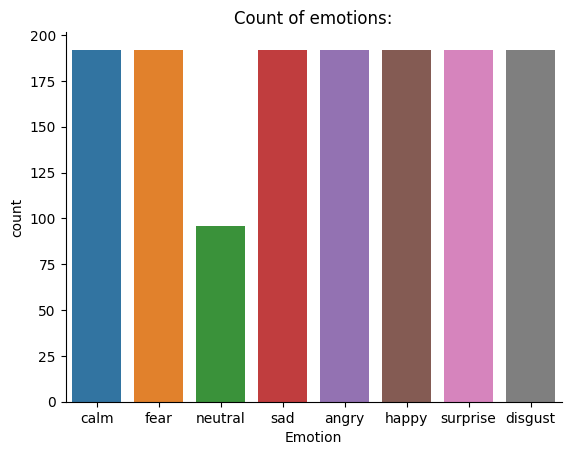

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Count of emotions:")
sns.countplot(x=shuffled_rav_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

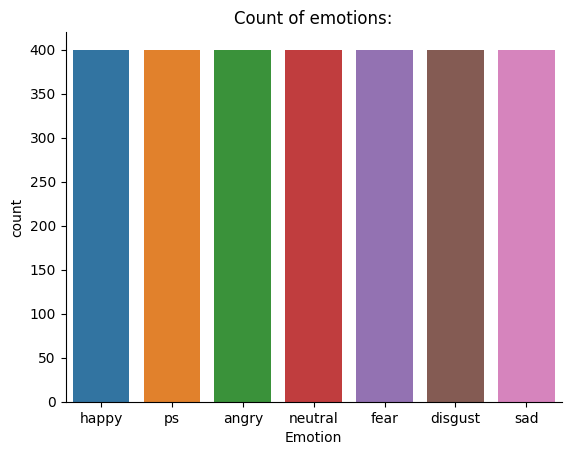

In [15]:
plt.title("Count of emotions:")
sns.countplot(x=shuffled_tess_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [16]:
shuffled_rav_df = shuffled_rav_df[shuffled_rav_df['Emotion'] != 'neutral']
shuffled_rav_df.head()

,Emotion,Path
0,calm,/kaggle/input/ravdess-emotional-speech-audio/A...
1,fear,/kaggle/input/ravdess-emotional-speech-audio/A...
3,sad,/kaggle/input/ravdess-emotional-speech-audio/A...
4,sad,/kaggle/input/ravdess-emotional-speech-audio/A...
6,angry,/kaggle/input/ravdess-emotional-speech-audio/A...


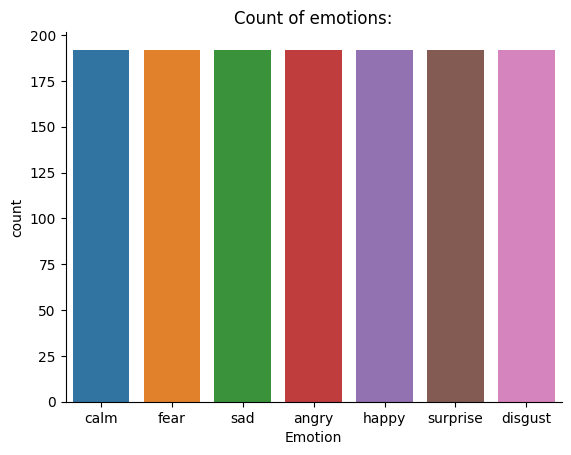

In [17]:
plt.title("Count of emotions:")
sns.countplot(x=shuffled_rav_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [18]:
def replace_calm(data):
    data = data.replace("calm", "neutral")
    return data

shuffled_rav_df['Emotion'] = shuffled_rav_df['Emotion'].apply(replace_calm)

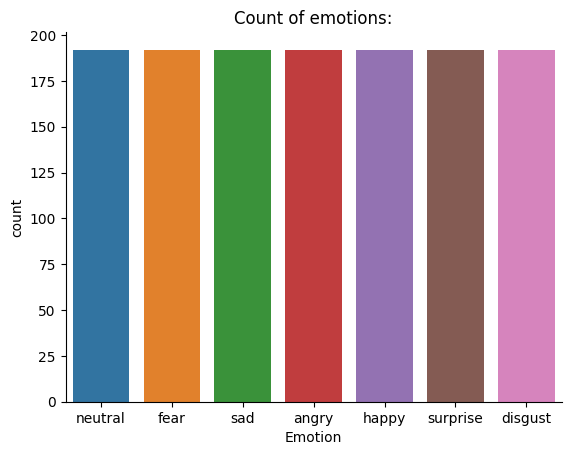

In [19]:
plt.title("Count of emotions:")
sns.countplot(x=shuffled_rav_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [20]:
shuffled_rav_df.isna().sum()

Emotion    0
Path       0
dtype: int64

In [21]:
shuffled_rav_df.shape

(1344, 2)

In [22]:
def replace_ps(data):
    data = data.replace("ps", "surprise")
    return data

shuffled_tess_df['Emotion'] = shuffled_tess_df['Emotion'].apply(replace_ps)

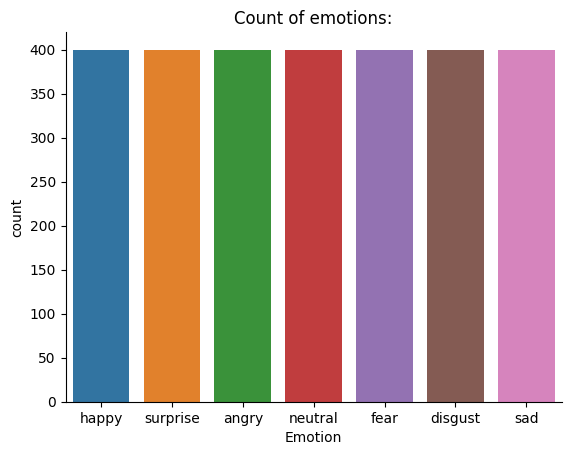

In [23]:
plt.title("Count of emotions:")
sns.countplot(x=shuffled_tess_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [24]:
df = pd.concat([shuffled_tess_df,shuffled_rav_df])

In [25]:
df.head()

,Emotion,Path
0,happy,/kaggle/input/toronto-emotional-speech-set-tes...
1,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...
3,neutral,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [26]:
df.isna().sum()

Emotion    0
Path       0
dtype: int64

In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Emotion,Path
0,disgust,/kaggle/input/toronto-emotional-speech-set-tes...
1,happy,/kaggle/input/toronto-emotional-speech-set-tes...
2,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
3,sad,/kaggle/input/ravdess-emotional-speech-audio/A...
4,disgust,/kaggle/input/toronto-emotional-speech-set-tes...


In [28]:
df.shape

(4144, 2)

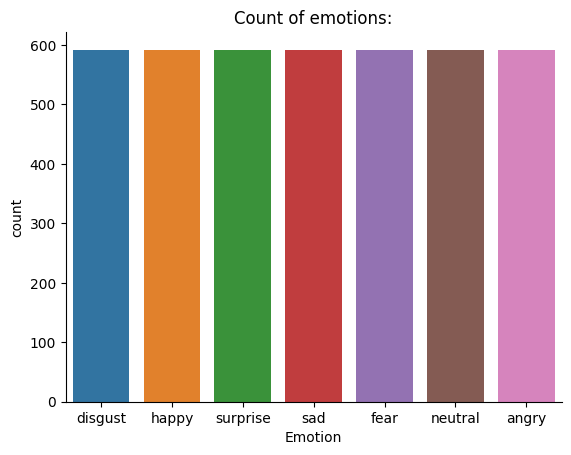

In [29]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [54]:
import librosa
import numpy as np

# Define the MFCC extractor function
def mfcc_extractor(audio, sample_rate):
    # Compute MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Scale features by taking the mean across frames
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Load the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav'
audio, sample_rate = librosa.load(file_path)

# Extract MFCC features
mfcc_features = mfcc_extractor(audio, sample_rate)

# Print the MFCC features
print("MFCC Features:", mfcc_features)


MFCC Features: [-6.4601691e+02  4.9119713e+01 -1.0800371e+01  1.1480021e+01
 -5.8222351e+00 -3.0823710e+00 -5.2919693e+00 -7.3189464e+00
 -2.7898769e+00 -1.9523786e+00 -3.2981880e+00 -2.3206317e+00
 -5.5060253e+00 -2.0005329e-01 -6.1006417e+00 -3.1250799e+00
 -2.3056040e+00 -9.4516498e-01 -1.8333842e+00 -4.4241020e-01
 -6.7567980e-01 -1.5757084e+00 -1.7977426e+00 -5.8347166e-02
 -1.4130220e+00 -3.0108972e+00 -1.7964355e+00 -1.1562464e+00
  2.1920462e+00  2.0218616e+00  6.0166317e-01  3.7600701e+00
  3.1306720e+00  3.7244592e+00  1.5275537e+00  3.5283821e+00
 -5.6242615e-01  2.0212288e+00 -6.1383492e-01 -1.4011627e-01]


In [51]:
import librosa
import numpy as np

# Define the ZCR extractor function
def zcr_extractor(audio, sample_rate):
    zcr_features = librosa.feature.zero_crossing_rate(y=audio)
    zcr_scaled_features = np.mean(zcr_features.T, axis=0)
    return zcr_scaled_features

# Load the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'
audio, sample_rate = librosa.load(file_path)

# Call the zcr_extractor function
zcr_features = zcr_extractor(audio, sample_rate)
print("ZCR Features:", zcr_features)


ZCR Features: [0.32897275]


In [55]:
import librosa
import numpy as np

# Define the spectral roll-off extractor function
def srf_extractor(audio, sample_rate):
    # Compute the Short-Time Fourier Transform (STFT)
    S, phase = librosa.magphase(librosa.stft(audio))
    # Compute the spectral roll-off feature
    srf_features = librosa.feature.spectral_rolloff(S=S, sr=sample_rate)
    # Scale features by taking the mean across frames
    srf_scaled_features = np.mean(srf_features.T, axis=0)
    return srf_scaled_features

# Load the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'
audio, sample_rate = librosa.load(file_path)

# Extract SRF features
srf_features = srf_extractor(audio, sample_rate)

# Print the SRF features
print("Spectral Roll-Off Features:", srf_features)


Spectral Roll-Off Features: [6144.16264259]


In [56]:
import librosa
import numpy as np

# Define the spectral flux extractor function
def flux_extractor(audio, sample_rate):
    # Compute spectral flux using onset strength
    flux_features = librosa.onset.onset_strength(y=audio, sr=sample_rate)
    # Scale features by taking the mean
    flux_scaled_features = np.mean(flux_features)
    return flux_scaled_features

# Load the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'
audio, sample_rate = librosa.load(file_path)

# Extract flux features
flux_features = flux_extractor(audio, sample_rate)

# Print the flux features
print("Spectral Flux Features:", flux_features)


Spectral Flux Features: 1.3151883


In [57]:
import librosa
import numpy as np

# Define the chroma feature extractor function
def chroma_extractor(audio, sample_rate):
    # Compute chroma features
    chroma_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    # Scale features by taking the mean
    chroma_scaled_features = np.mean(chroma_features.T, axis=0)
    return chroma_scaled_features

# Load the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'
audio, sample_rate = librosa.load(file_path)

# Extract chroma features
chroma_features = chroma_extractor(audio, sample_rate)

# Print the chroma features
print("Chroma Features:", chroma_features)


Chroma Features: [0.45639104 0.47124606 0.53557926 0.5192865  0.5290075  0.5192183
 0.5306971  0.55971575 0.50222105 0.47549775 0.5444157  0.5072577 ]


In [58]:
import librosa
import numpy as np

# Define the pitch extractor function
def pitch_extractor(file):
    # Load the audio file
    audio, sample_rate = librosa.load(file)
    
    # Compute pitch and magnitude
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sample_rate)
    
    # Aggregate pitch information
    pitch_scaled_features = np.mean(pitches[pitches > 0])  # Filter out zero values (no pitch)
    
    return pitch_scaled_features

# File path to the audio file
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'

# Extract pitch features
pitch_features = pitch_extractor(file_path)

# Print the pitch features
print("Pitch Features:", pitch_features)


Pitch Features: 1696.5684


In [61]:
import librosa

# Define the unified feature extractor
def features_extractor(file):
    # Load the audio file
    audio, sample_rate = librosa.load(file)
    
    # Extract individual features
    mfcc = mfcc_extractor(audio, sample_rate)
    zcr = zcr_extractor(audio, sample_rate)
    srf = srf_extractor(audio, sample_rate)
    flux = flux_extractor(audio, sample_rate)
    chroma = chroma_extractor(audio, sample_rate)
    pitch = pitch_extractor(file)  # pitch_extractor handles file loading internally
    
    return mfcc, zcr, srf, flux, chroma, pitch

# Call the feature extractor
file_path = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav'
features = features_extractor(file_path)

# Print the features
print("Extracted Features:")
print("MFCC:", features[0])
print("ZCR:", features[1])
print("SRF:", features[2])
print("Flux:", features[3])
print("Chroma:", features[4])
print("Pitch:", features[5])


Extracted Features:
MFCC: [-6.2257861e+02  5.1311447e+01 -1.0439537e+01  4.7658195e+00
 -4.8091679e+00 -3.2195768e+00 -5.7218094e+00 -9.3936377e+00
 -5.2450948e+00 -1.9874320e+00 -5.0377989e+00 -2.8686633e+00
 -6.4203172e+00  1.5982889e+00 -6.2688971e+00 -3.1418836e+00
 -3.2153883e+00 -3.4863596e+00 -1.2199960e+00 -5.1730104e-02
 -2.2478864e-01 -5.7490176e-01 -6.0318977e-01 -3.3235908e-01
  2.4324316e-01 -9.1619986e-01  2.0808172e+00  2.9753082e+00
  2.1127467e+00  2.9116223e+00 -1.7979436e-01  2.9378657e+00
  1.0441653e+00  1.7601390e+00  1.5014974e+00  4.3621869e+00
 -1.2110754e+00  5.9135360e-01 -1.0897059e+00  1.2800697e+00]
ZCR: [0.32897275]
SRF: [6144.16264259]
Flux: 1.3151883
Chroma: [0.45639104 0.47124606 0.53557926 0.5192865  0.5290075  0.5192183
 0.5306971  0.55971575 0.50222105 0.47549775 0.5444157  0.5072577 ]
Pitch: 1696.5684


In [63]:
import librosa

# Initialize the list to store features
extracted_features = []
count = 0

# Loop through the DataFrame
for file, emotion in zip(df['Path'], df['Emotion']):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file)
        
        # Extract features
        mfcc = mfcc_extractor(audio, sample_rate)
        zcr = zcr_extractor(audio, sample_rate)
        srf = srf_extractor(audio, sample_rate)
        flux = flux_extractor(audio, sample_rate)
        chroma = chroma_extractor(audio, sample_rate)
        pitch = pitch_extractor(file)  # pitch_extractor handles file loading internally
        
        # Append extracted features and emotion to the list
        extracted_features.append([mfcc, zcr, srf, flux, chroma, pitch, emotion])
        
        # Increment count and display progress
        count += 1
        print(f"Processed {count} files")
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Convert extracted features into a DataFrame if needed
import pandas as pd
columns = ['MFCC', 'ZCR', 'SRF', 'Flux', 'Chroma', 'Pitch', 'Emotion']
features_df = pd.DataFrame(extracted_features, columns=columns)


Processed 1 files
Processed 2 files
Processed 3 files
Processed 4 files
Processed 5 files
Processed 6 files
Processed 7 files
Processed 8 files
Processed 9 files
Processed 10 files
Processed 11 files
Processed 12 files
Processed 13 files
Processed 14 files
Processed 15 files
Processed 16 files
Processed 17 files
Processed 18 files
Processed 19 files
Processed 20 files
Processed 21 files
Processed 22 files
Processed 23 files
Processed 24 files
Processed 25 files
Processed 26 files
Processed 27 files
Processed 28 files
Processed 29 files
Processed 30 files
Processed 31 files
Processed 32 files
Processed 33 files
Processed 34 files
Processed 35 files
Processed 36 files
Processed 37 files
Processed 38 files
Processed 39 files
Processed 40 files
Processed 41 files
Processed 42 files
Processed 43 files
Processed 44 files
Processed 45 files
Processed 46 files
Processed 47 files
Processed 48 files
Processed 49 files
Processed 50 files
Processed 51 files
Processed 52 files
Processed 53 files
Pr

In [ ]:
extracted_features

In [100]:
# Save the DataFrame as a CSV file
df.to_csv('extracted_features.csv', index=False)


In [101]:
from IPython.display import FileLink

# Provide a link to download the file
FileLink('extracted_features.csv')


/kaggle/working/extracted_features.csv

In [102]:
# Save to Kaggle's working directory
df.to_csv('/kaggle/working/extracted_features.csv', index=False)


In [65]:
import pickle
# Specify the file path where you want to save the object
file_path = '/kaggle/working/data.pkl'

# Dump (serialize) the object to the file
with open(file_path, 'wb') as file:
    pickle.dump(extracted_features, file)


In [67]:
df=pd.DataFrame(extracted_features,columns=['mfcc','zcr','srf','flux', 'chroma', 'pitch','class'])
df.head()

,mfcc,zcr,srf,flux,chroma,pitch,class
0,"[-460.3873, 95.14922, 27.092548, -10.131971, -...",[0.11028403424202128],[2826.118371841755],2.014929,"[0.14815068, 0.17387787, 0.22308652, 0.3304172...",1291.593750,disgust
1,"[-435.90298, 102.43367, 13.225365, -15.890294,...",[0.1015625],[2870.1851760284812],2.200874,"[0.24220653, 0.266498, 0.2966198, 0.4015195, 0...",1356.526733,happy
2,"[-366.75555, 38.483513, 0.14046526, 16.390877,...",[0.19764819587628865],[5132.7830521101805],2.440850,"[0.3156661, 0.36360934, 0.36404482, 0.30917668...",2133.875000,surprise
3,"[-474.8492, 30.198479, -20.86598, -8.209586, -...",[0.2264192318488024],[6061.1453850112275],1.443318,"[0.3818064, 0.32313204, 0.3592106, 0.35902822,...",1748.597534,sad
4,"[-454.43323, 58.07751, 24.169186, 17.504715, 9...",[0.10885447376179246],[4250.36989607901],1.858909,"[0.43827653, 0.37197247, 0.26871267, 0.2710791...",2060.074219,disgust


In [68]:
def single_val(data):
    return data[0]

In [ ]:
def single_val(data):
    return data[0]

df['zcr'] = df['zcr'].apply(single_val)
df['srf'] = df['srf'].apply(single_val)
df.head()

In [72]:
df.shape

(4144, 7)

In [73]:
df.isna().sum()

mfcc      0
zcr       0
srf       0
flux      0
chroma    0
pitch     0
class     0
dtype: int64

In [74]:
pitch = df[['pitch']]
df.drop(columns=['pitch'], inplace=True)
df.head()

,mfcc,zcr,srf,flux,chroma,class
0,"[-460.3873, 95.14922, 27.092548, -10.131971, -...",0.110284,2826.118372,2.014929,"[0.14815068, 0.17387787, 0.22308652, 0.3304172...",disgust
1,"[-435.90298, 102.43367, 13.225365, -15.890294,...",0.101562,2870.185176,2.200874,"[0.24220653, 0.266498, 0.2966198, 0.4015195, 0...",happy
2,"[-366.75555, 38.483513, 0.14046526, 16.390877,...",0.197648,5132.783052,2.440850,"[0.3156661, 0.36360934, 0.36404482, 0.30917668...",surprise
3,"[-474.8492, 30.198479, -20.86598, -8.209586, -...",0.226419,6061.145385,1.443318,"[0.3818064, 0.32313204, 0.3592106, 0.35902822,...",sad
4,"[-454.43323, 58.07751, 24.169186, 17.504715, 9...",0.108854,4250.369896,1.858909,"[0.43827653, 0.37197247, 0.26871267, 0.2710791...",disgust


In [75]:
df.shape, df.isna().sum()

((4144, 6),
 mfcc      0
 zcr       0
 srf       0
 flux      0
 chroma    0
 class     0
 dtype: int64)

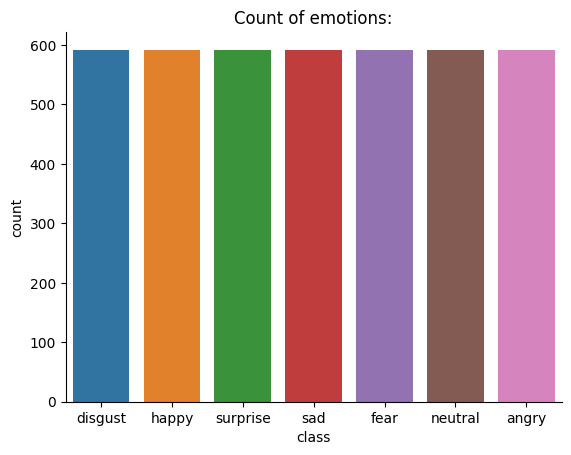

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Count of emotions:")
sns.countplot(x=df["class"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [77]:
df[['mfcc', 'zcr', 'srf', 'flux', 'chroma']]

,mfcc,zcr,srf,flux,chroma
0,"[-460.3873, 95.14922, 27.092548, -10.131971, -...",0.110284,2826.118372,2.014929,"[0.14815068, 0.17387787, 0.22308652, 0.3304172..."
1,"[-435.90298, 102.43367, 13.225365, -15.890294,...",0.101562,2870.185176,2.200874,"[0.24220653, 0.266498, 0.2966198, 0.4015195, 0..."
2,"[-366.75555, 38.483513, 0.14046526, 16.390877,...",0.197648,5132.783052,2.440850,"[0.3156661, 0.36360934, 0.36404482, 0.30917668..."
3,"[-474.8492, 30.198479, -20.86598, -8.209586, -...",0.226419,6061.145385,1.443318,"[0.3818064, 0.32313204, 0.3592106, 0.35902822,..."
4,"[-454.43323, 58.07751, 24.169186, 17.504715, 9...",0.108854,4250.369896,1.858909,"[0.43827653, 0.37197247, 0.26871267, 0.2710791..."
...,...,...,...,...,...
4139,"[-382.43045, 28.183767, 6.464112, 31.460089, 0...",0.209423,5411.902965,2.019058,"[0.18417943, 0.30946168, 0.50153565, 0.2128535..."
4140,"[-668.7458, 55.410492, -9.870233, 8.890352, -5...",0.246199,4201.088298,1.285796,"[0.33350518, 0.29868004, 0.27191725, 0.3553027..."
4141,"[-348.17795, -5.788204, 0.2967067, 16.6858, -2...",0.305730,6487.998962,2.306712,"[0.4389329, 0.41998553, 0.30924428, 0.26042917..."
4142,"[-396.51062, 35.029137, 7.4293013, 2.0078814, ...",0.233222,5546.176928,2.357177,"[0.3652566, 0.43825004, 0.38582754, 0.3543313,..."


In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[['zcr', 'srf', 'flux']] = ss.fit_transform(df[['zcr', 'srf', 'flux']])


In [79]:
df.head()

,mfcc,zcr,srf,flux,chroma,class
0,"[-460.3873, 95.14922, 27.092548, -10.131971, -...",-0.897020,-1.985189,0.323331,"[0.14815068, 0.17387787, 0.22308652, 0.3304172...",disgust
1,"[-435.90298, 102.43367, 13.225365, -15.890294,...",-1.009195,-1.940851,0.767750,"[0.24220653, 0.266498, 0.2966198, 0.4015195, 0...",happy
2,"[-366.75555, 38.483513, 0.14046526, 16.390877,...",0.226641,0.335678,1.341305,"[0.3156661, 0.36360934, 0.36404482, 0.30917668...",surprise
3,"[-474.8492, 30.198479, -20.86598, -8.209586, -...",0.596689,1.269757,-1.042852,"[0.3818064, 0.32313204, 0.3592106, 0.35902822,...",sad
4,"[-454.43323, 58.07751, 24.169186, 17.504715, 9...",-0.915407,-0.552168,-0.049565,"[0.43827653, 0.37197247, 0.26871267, 0.2710791...",disgust


In [80]:
mfcc=np.array(df['mfcc'].tolist())
zcr=np.array(df['zcr'].tolist()).reshape(-1,1)
srf=np.array(df['srf'].tolist()).reshape(-1,1)
flux=np.array(df['flux'].tolist()).reshape(-1,1)
chroma=np.array(df['chroma'].tolist())
y=np.array(df['class'].tolist())

In [81]:
flux.reshape(-1,1).shape

(4144, 1)

In [82]:
X = np.concatenate((mfcc, zcr, srf, flux, chroma), axis=1)

In [83]:
X.shape, y.shape

((4144, 55), (4144,))

In [ ]:
# X[0][0].shape

In [84]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [85]:
classes = labelencoder.classes_
classes

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [87]:
X_train.shape, y_train.shape

((3315, 55), (3315, 7))

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [89]:
num_labels=y.shape[1]

In [90]:
model_new=Sequential()
###first layer
model_new.add(Dense(300,input_shape=(55,)))
model_new.add(Activation('relu'))
# model_new.add(Dropout(0.3))
###second layer
model_new.add(Dense(300))
model_new.add(Activation('relu'))
# model_new.add(Dropout(0.3))
###third layer
model_new.add(Dense(200))
model_new.add(Activation('relu'))
# model_new.add(Dropout(0.3))

model_new.add(Dense(100))
model_new.add(Activation('relu'))

model_new.add(Dense(100))
model_new.add(Activation('relu'))

# model_new.add(Dense(100))
# model_new.add(Activation('relu'))
# model_new.add(Dropout(0.5))

###final layer
model_new.add(Dense(num_labels))
model_new.add(Activation('softmax'))

In [91]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               16800     
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 activation_1 (Activation)   (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [92]:
model_new.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [93]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/kaggle/working/first.h5', 
                               verbose=1, save_best_only=True)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,           # Reduce learning rate by a factor of 0.5
    patience=3,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,          # Minimum learning rate
    verbose=1             # Print messages
)
start = datetime.now()

model_new.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[reduce_lr_callback, checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
100/104 [===========================>..] - ETA: 0s - loss: 2.3329 - accuracy: 0.4209
Epoch 1: val_loss improved from inf to 1.08682, saving model to /kaggle/working/first.h5
104/104 [==============================] - 3s 10ms/step - loss: 2.2984 - accuracy: 0.4281 - val_loss: 1.0868 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 2/100
101/104 [============================>.] - ETA: 0s - loss: 1.0353 - accuracy: 0.6587
Epoch 2: val_loss improved from 1.08682 to 0.90768, saving model to /kaggle/working/first.h5
104/104 [==============================] - 1s 7ms/step - loss: 1.0308 - accuracy: 0.6597 - val_loss: 0.9077 - val_accuracy: 0.7201 - lr: 0.0010
Epoch 3/100
103/104 [============================>.] - ETA: 0s - loss: 0.8218 - accuracy: 0.7148
Epoch 3: val_loss improved from 0.90768 to 0.68864, saving model to /kaggle/working/first.h5
104/104 [==============================] - 1s 8ms/step - loss: 0.8215 - accuracy: 0.7146 - val_loss: 0.6886 - val_accuracy: 0.7527 - lr: 0.0010
E

In [94]:
test_accuracy_new=model_new.evaluate(X_test,y_test,verbose=0)
print(test_accuracy_new[1]) #second.h5

0.8311218619346619


In [97]:
y_pred = model_new.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
# y_pred

26/26 [==============================] - 0s 2ms/step


In [98]:
y_check = np.argmax(y_test, axis=1)
# y_check

Confusion matrix, without normalization
[[104   1   1   4   2   0   6]
 [  2  91   2   7   6   5   6]
 [  1   0 105   3   2   5   3]
 [  5   2   1 100   2   3   5]
 [  0   2   1   2 107   6   0]
 [  1   3  11   8  12  82   1]
 [  1   5   2   7   3   1 100]]


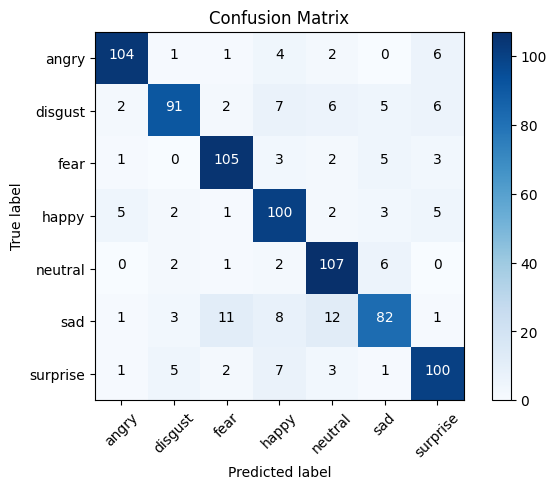

In [99]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
import tensorflow as tf

third_model = tf.keras.models.load_model('/kaggle/input/third_model/tensorflow2/default/1/third_model.h5')

In [ ]:
test_accuracy_sec=third_model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy_sec[1]) #second.h5

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
type(extracted_features)

In [ ]:
file_path = '/kaggle/input/sample-4/angry-mob-loop-6847.mp3'

In [ ]:
new_input(file_path, third_model)

In [ ]:
from IPython.display import Audio
Audio(file_path)

In [ ]:
# audio, sample_rate = librosa.load(filename) 
from sklearn.preprocessing import StandardScaler
def ip(file, third_model):
    emos = {
        0: "angry", 
        1: "disgust",
        2: "fear",
        3: "happy",
        4: "neutral",
        5: "sad",
        6: "surprise"
    }
    data, sr = librosa.load(file)
    extracted_features = []
    mfcc = mfcc_extractor(data, sr)
    zcr = zcr_extractor(data, sr)
    srf = srf_extractor(data, sr)
    flux = flux_extractor(data, sr)
    chroma = chroma_extractor(data, sr)
    extracted_features.append([mfcc,zcr,srf,flux,chroma])
    new_ip=pd.DataFrame(extracted_features,columns=['mfcc','zcr','srf','flux', 'chroma'])
    new_ip['zcr'] = new_ip['zcr'].apply(single_val)
    new_ip['srf'] = new_ip['srf'].apply(single_val)
    ss = StandardScaler()
    new_ip[['zcr', 'srf', 'flux']] = ss.fit_transform(new_ip[['zcr', 'srf', 'flux']])
    new_ip_mfcc=np.array(new_ip['mfcc'].tolist())
    new_ip_zcr=np.array(new_ip['zcr'].tolist()).reshape(-1,1)
    new_ip_srf=np.array(new_ip['srf'].tolist()).reshape(-1,1)
    new_ip_flux=np.array(new_ip['flux'].tolist()).reshape(-1,1)
    new_ip_chroma=np.array(new_ip['chroma'].tolist())
    new_ip_X = np.concatenate((new_ip_mfcc, new_ip_zcr, new_ip_srf, new_ip_flux, new_ip_chroma), axis=1)
    print(new_ip_X.shape)
    #print(mfccs_scaled_features)
    #mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    predicted_label=third_model.predict(new_ip_X)
    predicted_label = predicted_label.reshape(-1)
    print(predicted_label)
    ind = np.argmax(predicted_label)
    print(np.argmax(predicted_label))
    return emos[ind]

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

In [ ]:
file="/kaggle/input/sample-4/angry-mob-loop-6847.mp3"

ip(file, third_model)

In [ ]:
from IPython.display import Audio
Audio(file)

In [ ]:
import tensorflow_io as tfio
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
sample_path = "/kaggle/input/sample/vcastcanadiantaxshelter264848.mp3"
wav = load_mp3_16k_mono(sample_path)

In [ ]:
wav

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

In [ ]:
samples.shape

In [ ]:
from pydub.silence import split_on_silence
#reading from audio mp3 file
sound = AudioSegment.from_wav("/kaggle/input/sample-8/M_0052_12y10m_1.wav")
# spliting audio files
audio_chunks = split_on_silence(sound, min_silence_len=10000, silence_thresh=-40)

In [ ]:
len(audio_chunks)

In [ ]:
from pydub import AudioSegment
audio = AudioSegment.from_wav("/kaggle/input/sample-6/F_0811_10y4m_1.wav")

In [ ]:
len(audio)

In [ ]:
wav_file = "/kaggle/working/output4.wav"  # Specify the path for the output WAV file
audio.export(wav_file, format="wav")

In [ ]:
sample_path = "/kaggle/input/sample-11/M_0065_20y7m_1.wav"
#/kaggle/input/sample-8/M_0052_12y10m_1.wav
#/kaggle/input/sample-11/M_0065_20y7m_1.wav

In [ ]:
data, sr = librosa.load(sample_path)

In [ ]:
data.shape, sr

In [ ]:
# Define the duration of each chunk in seconds (4 seconds)
chunk_duration = 5

# Calculate the number of samples per chunk
chunk_samples = int(chunk_duration * sr)

# Split the audio into chunks
chunks = [data[i:i + chunk_samples] for i in range(0, len(data), chunk_samples)]

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import librosa
import tensorflow as tf

third_model = tf.keras.models.load_model('/kaggle/input/third_model/tensorflow2/default/1/third_model.h5')

In [41]:
def mfcc_extractor(audio, sample_rate):
    sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def zcr_extractor(audio, sample_rate):
    audio, sample_rate = librosa.load(file) 
    zcr_features = librosa.feature.zero_crossing_rate(y=audio)
    zcr_scaled_features = np.mean(zcr_features.T,axis=0)
    
    return zcr_scaled_features

def srf_extractor(audio, sample_rate):
    audio, sample_rate = librosa.load(file) 
    S, phase = librosa.magphase(librosa.stft(audio))
    srf_features = librosa.feature.spectral_rolloff(S=S, sr=sample_rate)
    srf_scaled_features = np.mean(srf_features.T,axis=0)
    
    return srf_scaled_features

def flux_extractor(audio, sample_rate):
    audio, sample_rate = librosa.load(file) 
    flux_features = librosa.onset.onset_strength(y=audio, sr=sample_rate)
    flux_scaled_features = np.mean(flux_features.T,axis=0)
    
    return flux_scaled_features

def chroma_extractor(audio, sample_rate):
    audio, sample_rate = librosa.load(file) 
    chroma_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_scaled_features = np.mean(chroma_features.T,axis=0)
    
    return chroma_scaled_features

def single_val(data):
    return data[0]

In [47]:
#/kaggle/input/sample-8/M_0052_12y10m_1.wav

sample_path = "/kaggle/input/big-clip-angry-baby/angry-baby-67191.wav"

data, sr = librosa.load(sample_path)
# Define the duration of each chunk in seconds (4 seconds)
chunk_duration = 5

# Calculate the number of samples per chunk
chunk_samples = int(chunk_duration * sr)

# Split the audio into chunks
chunks = [data[i:i + chunk_samples] for i in range(0, len(data), chunk_samples)]
emos = {
        0: "angry", 
        1: "disgust",
        2: "fear",
        3: "happy",
        4: "neutral",
        5: "sad",
        6: "surprise"
}
all_chunk_predictions = []
# np.array(audio_chunks[0].get_array_of_samples())
for chunk in chunks:
#     print("Chunk - ", chunk)
    sample_ext_ft = []
#     chunk = np.array(chunks.get_array_of_samples(), dtype=np.float32)
    sample_rate = librosa.get_samplerate(chunk)
    
    sample_mfccs_features = librosa.feature.mfcc(y=chunk, sr=22050, n_mfcc=40)
    sample_mfccs_scaled_features = np.mean(sample_mfccs_features.T,axis=0)

    # print(sample_mfccs_scaled_features)

    sample_zcr_features = librosa.feature.zero_crossing_rate(y=chunk)
    sample_zcr_scaled_features = np.mean(sample_zcr_features.T,axis=0)

    # print(sample_zcr_scaled_features)

    sample_S, sample_phase = librosa.magphase(librosa.stft(chunk))
    sample_srf_features = librosa.feature.spectral_rolloff(S=sample_S, sr=22050)
    sample_srf_scaled_features = np.mean(sample_srf_features.T,axis=0)
                                            

    sample_flux_features = librosa.onset.onset_strength(y=chunk, sr=22050)
    sample_flux_scaled_features = np.mean(sample_flux_features.T,axis=0)

    sample_chroma_features = librosa.feature.chroma_stft(y=chunk, sr=22050)
    sample_chroma_scaled_features = np.mean(sample_chroma_features.T,axis=0)
    
    sample_ext_ft.append([sample_mfccs_scaled_features,sample_zcr_scaled_features,sample_srf_scaled_features,sample_flux_scaled_features,sample_chroma_scaled_features])
    
    sample_new_ip=pd.DataFrame(sample_ext_ft,columns=['mfcc','zcr','srf','flux', 'chroma'])
    sample_new_ip['zcr'] = sample_new_ip['zcr'].apply(single_val)
    sample_new_ip['srf'] = sample_new_ip['srf'].apply(single_val)
    ss = StandardScaler()
    sample_new_ip[['zcr', 'srf', 'flux']] = ss.fit_transform(sample_new_ip[['zcr', 'srf', 'flux']])
    sample_new_ip_mfcc=np.array(sample_new_ip['mfcc'].tolist())
    sample_new_ip_zcr=np.array(sample_new_ip['zcr'].tolist()).reshape(-1,1)
    sample_new_ip_srf=np.array(sample_new_ip['srf'].tolist()).reshape(-1,1)
    sample_new_ip_flux=np.array(sample_new_ip['flux'].tolist()).reshape(-1,1)
    sample_new_ip_chroma=np.array(sample_new_ip['chroma'].tolist())
    sample_new_ip_X = np.concatenate((sample_new_ip_mfcc, sample_new_ip_zcr, sample_new_ip_srf, sample_new_ip_flux, sample_new_ip_chroma), axis=1)
#     print(sample_new_ip_X.shape)
    #print(mfccs_scaled_features)
    #mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    #print(mfccs_scaled_features.shape)
    sample_predicted_label=third_model.predict(sample_new_ip_X, verbose=False)
    sample_predicted_label = sample_predicted_label.reshape(-1)
#     print(sample_predicted_label)
    sample_ind = np.argmax(sample_predicted_label)
    all_chunk_predictions.append(sample_ind)
#     print(sample_ind)
#     print(emos[sample_ind])
                                              
                                              
# print(all_chunk_predictions)
result = []
for i in all_chunk_predictions:
    result.append(emos[i])
print(set(result))

{'surprise', 'disgust', 'angry'}


In [48]:
result = []
for i in all_chunk_predictions:
    result.append(emos[i])
print(set(result))

{'surprise', 'disgust', 'angry'}


In [ ]:
sample_extracted_features = []
mfcc = mfcc_extractor(file)
zcr = zcr_extractor(file)
srf = srf_extractor(file)
flux = flux_extractor(file)
chroma = chroma_extractor(file)
sample_extracted_features.append([mfcc,zcr,srf,flux,chroma])

In [ ]:
def mfcc_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def zcr_extractor(file):
    audio, sample_rate = librosa.load(file) 
    zcr_features = librosa.feature.zero_crossing_rate(y=audio)
    zcr_scaled_features = np.mean(zcr_features.T,axis=0)
    
    return zcr_scaled_features

def srf_extractor(file):
    audio, sample_rate = librosa.load(file) 
    S, phase = librosa.magphase(librosa.stft(audio))
    srf_features = librosa.feature.spectral_rolloff(S=S, sr=sample_rate)
    srf_scaled_features = np.mean(srf_features.T,axis=0)
    
    return srf_scaled_features

def flux_extractor(file):
    audio, sample_rate = librosa.load(file) 
    flux_features = librosa.onset.onset_strength(y=audio, sr=sample_rate)
    flux_scaled_features = np.mean(flux_features.T,axis=0)
    
    return flux_scaled_features

def chroma_extractor(file):
    audio, sample_rate = librosa.load(file) 
    chroma_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    chroma_scaled_features = np.mean(chroma_features.T,axis=0)
    
    return chroma_scaled_features
